# DAG and Binary Search Tree

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Random DAG

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


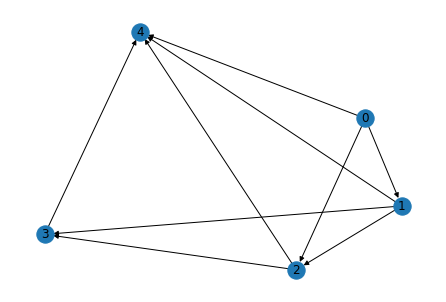

Is directed acyclic: True


In [2]:
G = nx.fast_gnp_random_graph(5, 0.5, directed=True)
DAG = nx.DiGraph([(u, v) for (u, v) in G.edges() if u < v])
nx.draw(DAG,with_labels=1)
plt.show()
print('Is directed acyclic:',nx.is_directed_acyclic_graph(DAG))

BFS Tree

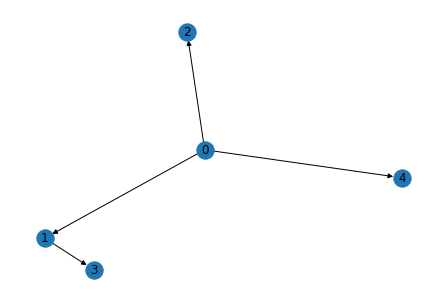

In [3]:
BFS = nx.bfs_tree(G,0)
nx.draw(BFS,with_labels=1)
plt.show()

DFS Tree

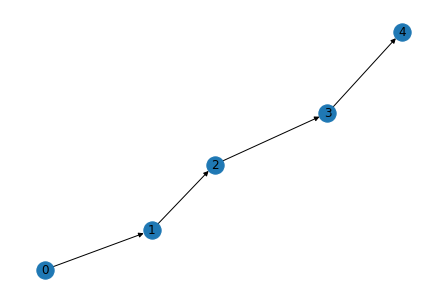

In [4]:
DFS = nx.dfs_tree(G,0)
nx.draw(DFS,with_labels=1)
plt.show()

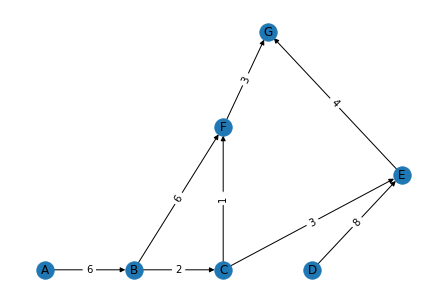

In [5]:
G = nx.DiGraph()
G.add_edge("A","B", weight = 6)
G.add_edge("B","C", weight = 2)
G.add_edge("C","E", weight = 3)
G.add_edge("C","F", weight = 1)
G.add_edge("D","E", weight = 8)
G.add_edge("F","G", weight = 3)
G.add_edge("B","F", weight = 6)
G.add_edge("E","G", weight = 2)
G.add_edge("E","G", weight = 4)
p = {"A":[-1,1],"B":[1,1],"C":[3,1],"D":[5,1],"E":[7,3],"F":[3,4],"G":[4,6]}
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos = p, with_labels=1)
nx.draw_networkx_edge_labels(G,pos = p,edge_labels=labels)
plt.show()

Topological Sort

In [6]:
print(list(nx.all_topological_sorts(G)))

[['D', 'A', 'B', 'C', 'F', 'E', 'G'], ['D', 'A', 'B', 'C', 'E', 'F', 'G'], ['A', 'B', 'C', 'F', 'D', 'E', 'G'], ['A', 'B', 'C', 'D', 'E', 'F', 'G'], ['A', 'B', 'C', 'D', 'F', 'E', 'G'], ['A', 'B', 'D', 'C', 'F', 'E', 'G'], ['A', 'B', 'D', 'C', 'E', 'F', 'G'], ['A', 'D', 'B', 'C', 'F', 'E', 'G'], ['A', 'D', 'B', 'C', 'E', 'F', 'G']]


Dijkstra Algorithm

In [7]:
print(nx.dijkstra_path(G,'A','G'))

['A', 'B', 'C', 'F', 'G']


Binary Search Tree

In [8]:
class Node:  
    def __init__(self,key):  
        self.left = None
        self.right = None
        self.val = key  

def insert(root,key):  
    if root is None:  
        return Node(key)  
    else: 
        if root.val == key: 
            return root 
        elif root.val < key:  
            root.right = insert(root.right, key)  
        else: 
            root.left = insert(root.left, key) 
    return root 

def minNode(node): 
    current = node 
    while(current.left is not None): 
        current = current.left  
    return current  
  
def deleteNode(root, key):  
    if root is None: 
        return root  
    if key < root.val: 
        root.left = deleteNode(root.left, key) 
    elif key > root.val: 
        root.right = deleteNode(root.right, key) 
    else: 
        if root.left is None : 
            temp = root.right  
            root = None 
            return temp               
        elif root.right is None : 
            temp = root.left  
            root = None
            return temp 
        temp = minNode(root.right) 
        root.val = temp.val  
        root.right = deleteNode(root.right , temp.val)  
    return root  

def inorder(root):  
    if root:  
        inorder(root.left)  
        print(root.val,end = ',')  
        inorder(root.right) 

In [9]:
r = Node(50)  
r = insert(r, 30)  
r = insert(r, 20)  
r = insert(r, 40)  
r = insert(r, 70)  
r = insert(r, 60)  
r = insert(r, 80)
print("Inorder traversal:",end = " ")
inorder(r)  
r = deleteNode(r, 80) 
print("\nInorder traversal of the modified tree:",end = " ")
inorder(r) 
r = deleteNode(r, 50) 
print ("\nInorder traversal of the modified tree:",end = " ")
inorder(r)

Inorder traversal: 20,30,40,50,60,70,80,
Inorder traversal of the modified tree: 20,30,40,50,60,70,
Inorder traversal of the modified tree: 20,30,40,60,70,